# Modelos de classificação - comportamento do consumidor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import plotly as py
import polars as pl

# Conjunto de Dados e Objetivos

- disponível em: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset

- **Objetivo:**
O Conjunto de Dados sobre Comportamento do Consumidor e Hábitos de Compras oferece a possibilidade de insights abrangentes sobre as preferências, tendências e padrões dos consumidores em locais dos Estados Unidos durante suas experiências de compras. Este conjunto de dados abrange uma variedade de variáveis, incluindo informações demográficas, histórico de compras, preferências de produtos, frequência de compras e comportamento em geral.Dessa forma, objetiva-se explorar as complexidades dos processos de tomada de decisão do consumidor, afim de gerar insights a respeitos dos dados, podendo auxiliar as empresas na criação de estratégias de marketing direcionadas, na otimização de ofertas de produtos e no aprimoramento geral da satisfação do cliente.

In [ ]:
#leitura arquivo

data = pd.read_csv('shopping_behavior_updated.csv')

In [ ]:
data.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


# Descrição do conjunto de dados escolhido

Origem: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset <br>
Nome: Consumer Behavior and Shopping Habits Dataset <br>
Tamanho: 406kb <br>
Quantidade de Registros: 3900<br>
Linhas x Colunas: 3900 x 18<br>
Dados Faltantes: Não existem dados faltantes<br>

# Pré-processamento dos dados

In [ ]:
#verificando características dos dados

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# identificando se há ocorrencia de valores nulos
valores_nulos_por_coluna = data.isnull().sum()

# Imprimindo a quantidade de valores nulos por coluna
print(valores_nulos_por_coluna)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


- Identificando valores unicos das colunas

In [ ]:
# Função para obter valores únicos e quantidade de valores únicos em uma coluna
def obter_valores_unicos(coluna):
    valores_unicos = coluna.unique()
    qtd_valores_unicos = coluna.nunique()
    return valores_unicos, qtd_valores_unicos

# Obtendo valores únicos e quantidade de valores únicos para cada coluna
for coluna in data.columns:
    valores_unicos, qtd_valores_unicos = obter_valores_unicos(data[coluna])
    print(f"\nColuna: {coluna}")
    print(f"Quantidade de valores únicos: {qtd_valores_unicos}")
    print("Valores únicos:")
    print(valores_unicos)


Coluna: Customer ID
Quantidade de valores únicos: 3900
Valores únicos:
[   1    2    3 ... 3898 3899 3900]

Coluna: Age
Quantidade de valores únicos: 53
Valores únicos:
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

Coluna: Gender
Quantidade de valores únicos: 2
Valores únicos:
['Male' 'Female']

Coluna: Item Purchased
Quantidade de valores únicos: 25
Valores únicos:
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Coluna: Category
Quantidade de valores únicos: 4
Valores únicos:
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Coluna: Purchase Amount (USD)
Quantidade de valores únicos: 81
Valores únicos:
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25

# Transformando colunas categóricas

Para este estudo, procuraremos predizer a coluna alvo Gender (genero) de acordo com as colunas numéricas. Como possuimos colunas categóricas (que não possuem valores numéricos atribuidos), será utilizado a técnica de codificação de rótulo one-hot encoding. Isso será feito pois no Label Encoding apresenta um problema com essa representação: "é que os algoritmos de ML assumirão que dois valores próximos são mais semelhante a dois valores distantes", de acordo com Geron em "Hands-on Machine Learning with Scikit-learn and TensorFlow", e este não é nosso caso. Apesar disso, utilizamos o Label Encoding com propósitos de estudo.

In [ ]:
# Função para aplicar Label Encoding em várias colunas

from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns):
    label_encoder = LabelEncoder()
    for col in columns:
        df[col+'_Encoded'] = label_encoder.fit_transform(df[col])

# Lista de colunas a serem codificadas
colunas_a_codificar = ['Item Purchased', 'Category', 'Location', 'Size', 'Color',
                       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Criando uma cópia do DataFrame original
data_encoded = data.copy()

# Aplicando a codificação de rótulos às colunas especificadas na cópia
label_encode_columns(data_encoded, colunas_a_codificar)


In [ ]:
# Exibindo o DataFrame resultante
data_encoded.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Location_Encoded,Size_Encoded,Color_Encoded,Season_Encoded,Subscription Status_Encoded,Shipping Type_Encoded,Discount Applied_Encoded,Promo Code Used_Encoded,Payment Method_Encoded,Frequency of Purchases_Encoded
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,16,0,7,3,1,1,1,1,5,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,18,0,12,3,1,1,1,1,1,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,20,2,12,1,1,2,1,1,2,6
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,38,1,12,1,1,3,1,1,4,6
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,36,1,21,1,1,2,1,1,4,0


In [ ]:
# Criando um dicionário de par ordenado (coluna descritiva -> coluna encoded)
par_ordenado = {}

# Obtendo os pares ordenados para cada par de colunas descritiva e encoded
for coluna_descritiva in data_encoded.columns:
    if '_Encoded' in coluna_descritiva:
        coluna_descritiva_original = coluna_descritiva.replace('_Encoded', '')
        valores_unicos = data_encoded[coluna_descritiva_original].unique()
        par_ordenado[coluna_descritiva_original] = dict(zip(valores_unicos, data_encoded[coluna_descritiva].unique()))

# Exibindo o par ordenado (dicionário) de forma amigável visualmente
for coluna_descritiva, mapeamento in par_ordenado.items():
    print(f"\nColuna Descritiva: {coluna_descritiva}")
    print("Mapeamento:")
    for valor_descritivo, valor_encoded in mapeamento.items():
        print(f"  {valor_descritivo} -> {valor_encoded}")


Coluna Descritiva: Item Purchased
Mapeamento:
  Blouse -> 2
  Sweater -> 23
  Jeans -> 11
  Sandals -> 14
  Sneakers -> 20
  Shirt -> 16
  Shorts -> 18
  Coat -> 4
  Handbag -> 7
  Shoes -> 17
  Dress -> 5
  Skirt -> 19
  Sunglasses -> 22
  Pants -> 13
  Jacket -> 10
  Hoodie -> 9
  Jewelry -> 12
  T-shirt -> 24
  Scarf -> 15
  Hat -> 8
  Socks -> 21
  Backpack -> 0
  Belt -> 1
  Boots -> 3
  Gloves -> 6

Coluna Descritiva: Category
Mapeamento:
  Clothing -> 1
  Footwear -> 2
  Outerwear -> 3
  Accessories -> 0

Coluna Descritiva: Location
Mapeamento:
  Kentucky -> 16
  Maine -> 18
  Massachusetts -> 20
  Rhode Island -> 38
  Oregon -> 36
  Wyoming -> 49
  Montana -> 25
  Louisiana -> 17
  West Virginia -> 47
  Missouri -> 24
  Arkansas -> 3
  Hawaii -> 10
  Delaware -> 7
  New Hampshire -> 28
  New York -> 31
  Alabama -> 0
  Mississippi -> 23
  North Carolina -> 32
  California -> 4
  Oklahoma -> 35
  Florida -> 8
  Texas -> 42
  Nevada -> 27
  Kansas -> 15
  Colorado -> 5
  North D

In [ ]:
'''# fazendo listagem do item descritivo e seu respectivo valor encodado

from sklearn.preprocessing import OneHotEncoder

def obter_pares_ordenados(data, columns_to_encode=None):
    if columns_to_encode is None:
        raise ValueError("Você deve fornecer uma lista de colunas para obter os pares ordenados.")

    # Aplicar a codificação one-hot
    data_encoded = apply_one_hot_encoding(data, columns_to_encode)

    # Criar um dicionário de par ordenado (coluna descritiva -> coluna encoded)
    par_ordenado = {}

    # Obtendo os pares ordenados para cada par de colunas descritiva e encoded
    for coluna_descritiva in data_encoded.columns:
        if coluna_descritiva.endswith('_Encoded'):
            coluna_descritiva_original = coluna_descritiva.replace('_Encoded', '')
            valores_unicos = data_encoded[coluna_descritiva_original].unique()
            par_ordenado[coluna_descritiva_original] = dict(zip(valores_unicos, data_encoded[coluna_descritiva].unique()))

    return par_ordenado

# Colunas que você deseja codificar one-hot
colunas_a_codificar = ['Item Purchased', 'Category', 'Location', 'Size', 'Color',
                       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Obter pares ordenados apenas para as colunas selecionadas
pares_ordenados = obter_pares_ordenados(data, columns_to_encode=colunas_a_codificar)

# Exibindo os pares ordenados de forma amigável visualmente
for coluna_descritiva, mapeamento in pares_ordenados.items():
    print(f"\nColuna Descritiva: {coluna_descritiva}")
    print("Mapeamento:")
    for valor_descritivo, valor_encoded in mapeamento.items():
        print(f"  {valor_descritivo} -> {valor_encoded}")'''

'# fazendo listagem do item descritivo e seu respectivo valor encodado\n\nfrom sklearn.preprocessing import OneHotEncoder\n\ndef obter_pares_ordenados(data, columns_to_encode=None):\n    if columns_to_encode is None:\n        raise ValueError("Você deve fornecer uma lista de colunas para obter os pares ordenados.")\n\n    # Aplicar a codificação one-hot\n    data_encoded = apply_one_hot_encoding(data, columns_to_encode)\n\n    # Criar um dicionário de par ordenado (coluna descritiva -> coluna encoded)\n    par_ordenado = {}\n\n    # Obtendo os pares ordenados para cada par de colunas descritiva e encoded\n    for coluna_descritiva in data_encoded.columns:\n        if coluna_descritiva.endswith(\'_Encoded\'):\n            coluna_descritiva_original = coluna_descritiva.replace(\'_Encoded\', \'\')\n            valores_unicos = data_encoded[coluna_descritiva_original].unique()\n            par_ordenado[coluna_descritiva_original] = dict(zip(valores_unicos, data_encoded[coluna_descritiva].u

In [ ]:
# fazendo codificação a partir do método one-hot encoding
from pandas.core.frame import DataFrame
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot_encoding(df, columns_to_encode=None):
    if columns_to_encode is None:
        raise ValueError("Você deve fornecer uma lista de colunas para codificar.")

    # Verificar se as colunas fornecidas existem no DataFrame
    non_existing_columns = set(columns_to_encode) - set(df.columns)
    if non_existing_columns:
        raise ValueError(f"As seguintes colunas especificadas para codificação one-hot não existem no DataFrame: {non_existing_columns}")

    # Identificar colunas puramente categóricas (exceto 'Gender')
    categorical_columns = set(columns_to_encode) - {'Gender'}

    # Remover colunas puramente categóricas antes da codificação one-hot
    colunas_para_deletar = ['Location', 'Color']
    df = df.drop(colunas_para_deletar, axis=1)

 # Aplicar codificação one-hot para as colunas especificadas
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

    return df_encoded

# Colunas que você deseja codificar one-hot
colunas_a_codificar = ['Item Purchased', 'Category', 'Size',
                       'Season', 'Subscription Status', 'Shipping Type',
                       'Discount Applied', 'Promo Code Used', 'Payment Method',
                       'Frequency of Purchases']

# Aplicar a codificação one-hot apenas para as colunas selecionadas
data_encoded = apply_one_hot_encoding(data, columns_to_encode=colunas_a_codificar)



In [ ]:
data_encoded.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Previous Purchases,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,Male,53,3.1,14,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,19,Male,64,3.1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,50,Male,73,3.1,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,21,Male,90,3.5,49,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,45,Male,49,2.7,31,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


Nessa nova tabela, itens descritivos de colunas específicas foram transformadas em colunas. Agora é apresentada uma resposta binária: O Customer Adquiriu um backpack ou não, o Customer pagou via PayPal ou não e assim por diante.

# Separando os dados
- Para trabalhar com Aprendizado de Machina Supervisionado, precisamos dividir os dados em dois conjuntos: **Conjunto de treinamento** e **conjunto de teste**, para evitar overffiting do algoritmo.

In [ ]:
# dividindo o conjunto de dados em duas partes: uma para treinamento do modelo e outra para teste do modelo
from sklearn.model_selection import train_test_split

In [ ]:
x = data_encoded.drop(columns = 'Gender')
y = data_encoded['Gender']

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
247,248,29,66,4.4,14,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2591,2592,40,61,3.3,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1822,1823,66,85,4.4,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3483,3484,19,37,3.9,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2771,2772,58,52,3.1,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_train.head(5)

247       Male
2591      Male
1822      Male
3483    Female
2771    Female
Name: Gender, dtype: object

# Transformando os dados
1) **Nomalização** (Normalization) - Também conhecido como escalonamento Min-Max no qual o range de valores da coluna irá fica de 0 (min) até 1 (max);

2) **Padronização** (Standardization) - Modifica a distribuição para que a média seja igual a zero e desvio padrão igual a 1 (o método subtrai a média de todas as entradas e dividide pelo desvio padrão);

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler

# Separando colunas numéricas e categóricas no conjunto de treinamento
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Padronizando apenas colunas numéricas no conjunto de treinamento
scaler = StandardScaler()
x_train_numeric_standardized = pd.DataFrame(scaler.fit_transform(x_train[numeric_cols]), columns=numeric_cols)

# Normalizando o conjunto de treinamento padronizado
x_train_numeric_standardized_normalized = normalize(x_train_numeric_standardized, norm='l2', axis=0)

In [ ]:
# Convertendo o array NumPy de volta para um DataFrame
x_train_numeric_standardized_normalized_df = pd.DataFrame(x_train_numeric_standardized_normalized, columns=numeric_cols)

# Exibindo as primeiras linhas do DataFrame
print("Conjunto de Treinamento Numérico Normalizado e Padronizado:")
x_train_numeric_standardized_normalized_df.head()


Conjunto de Treinamento Numérico Normalizado e Padronizado:


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,-0.027399,-0.017709,0.004429,0.016363,-0.014060
1,0.009977,-0.004759,0.000648,-0.011357,0.018000
2,-0.002285,0.025848,0.018798,0.016363,-0.026391
3,0.024200,-0.029481,-0.017501,0.003763,-0.005429
4,0.012847,0.016430,-0.006158,-0.016397,-0.016527


# Correlação das variáveis

<ipython-input-19-6f26eb959ab9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


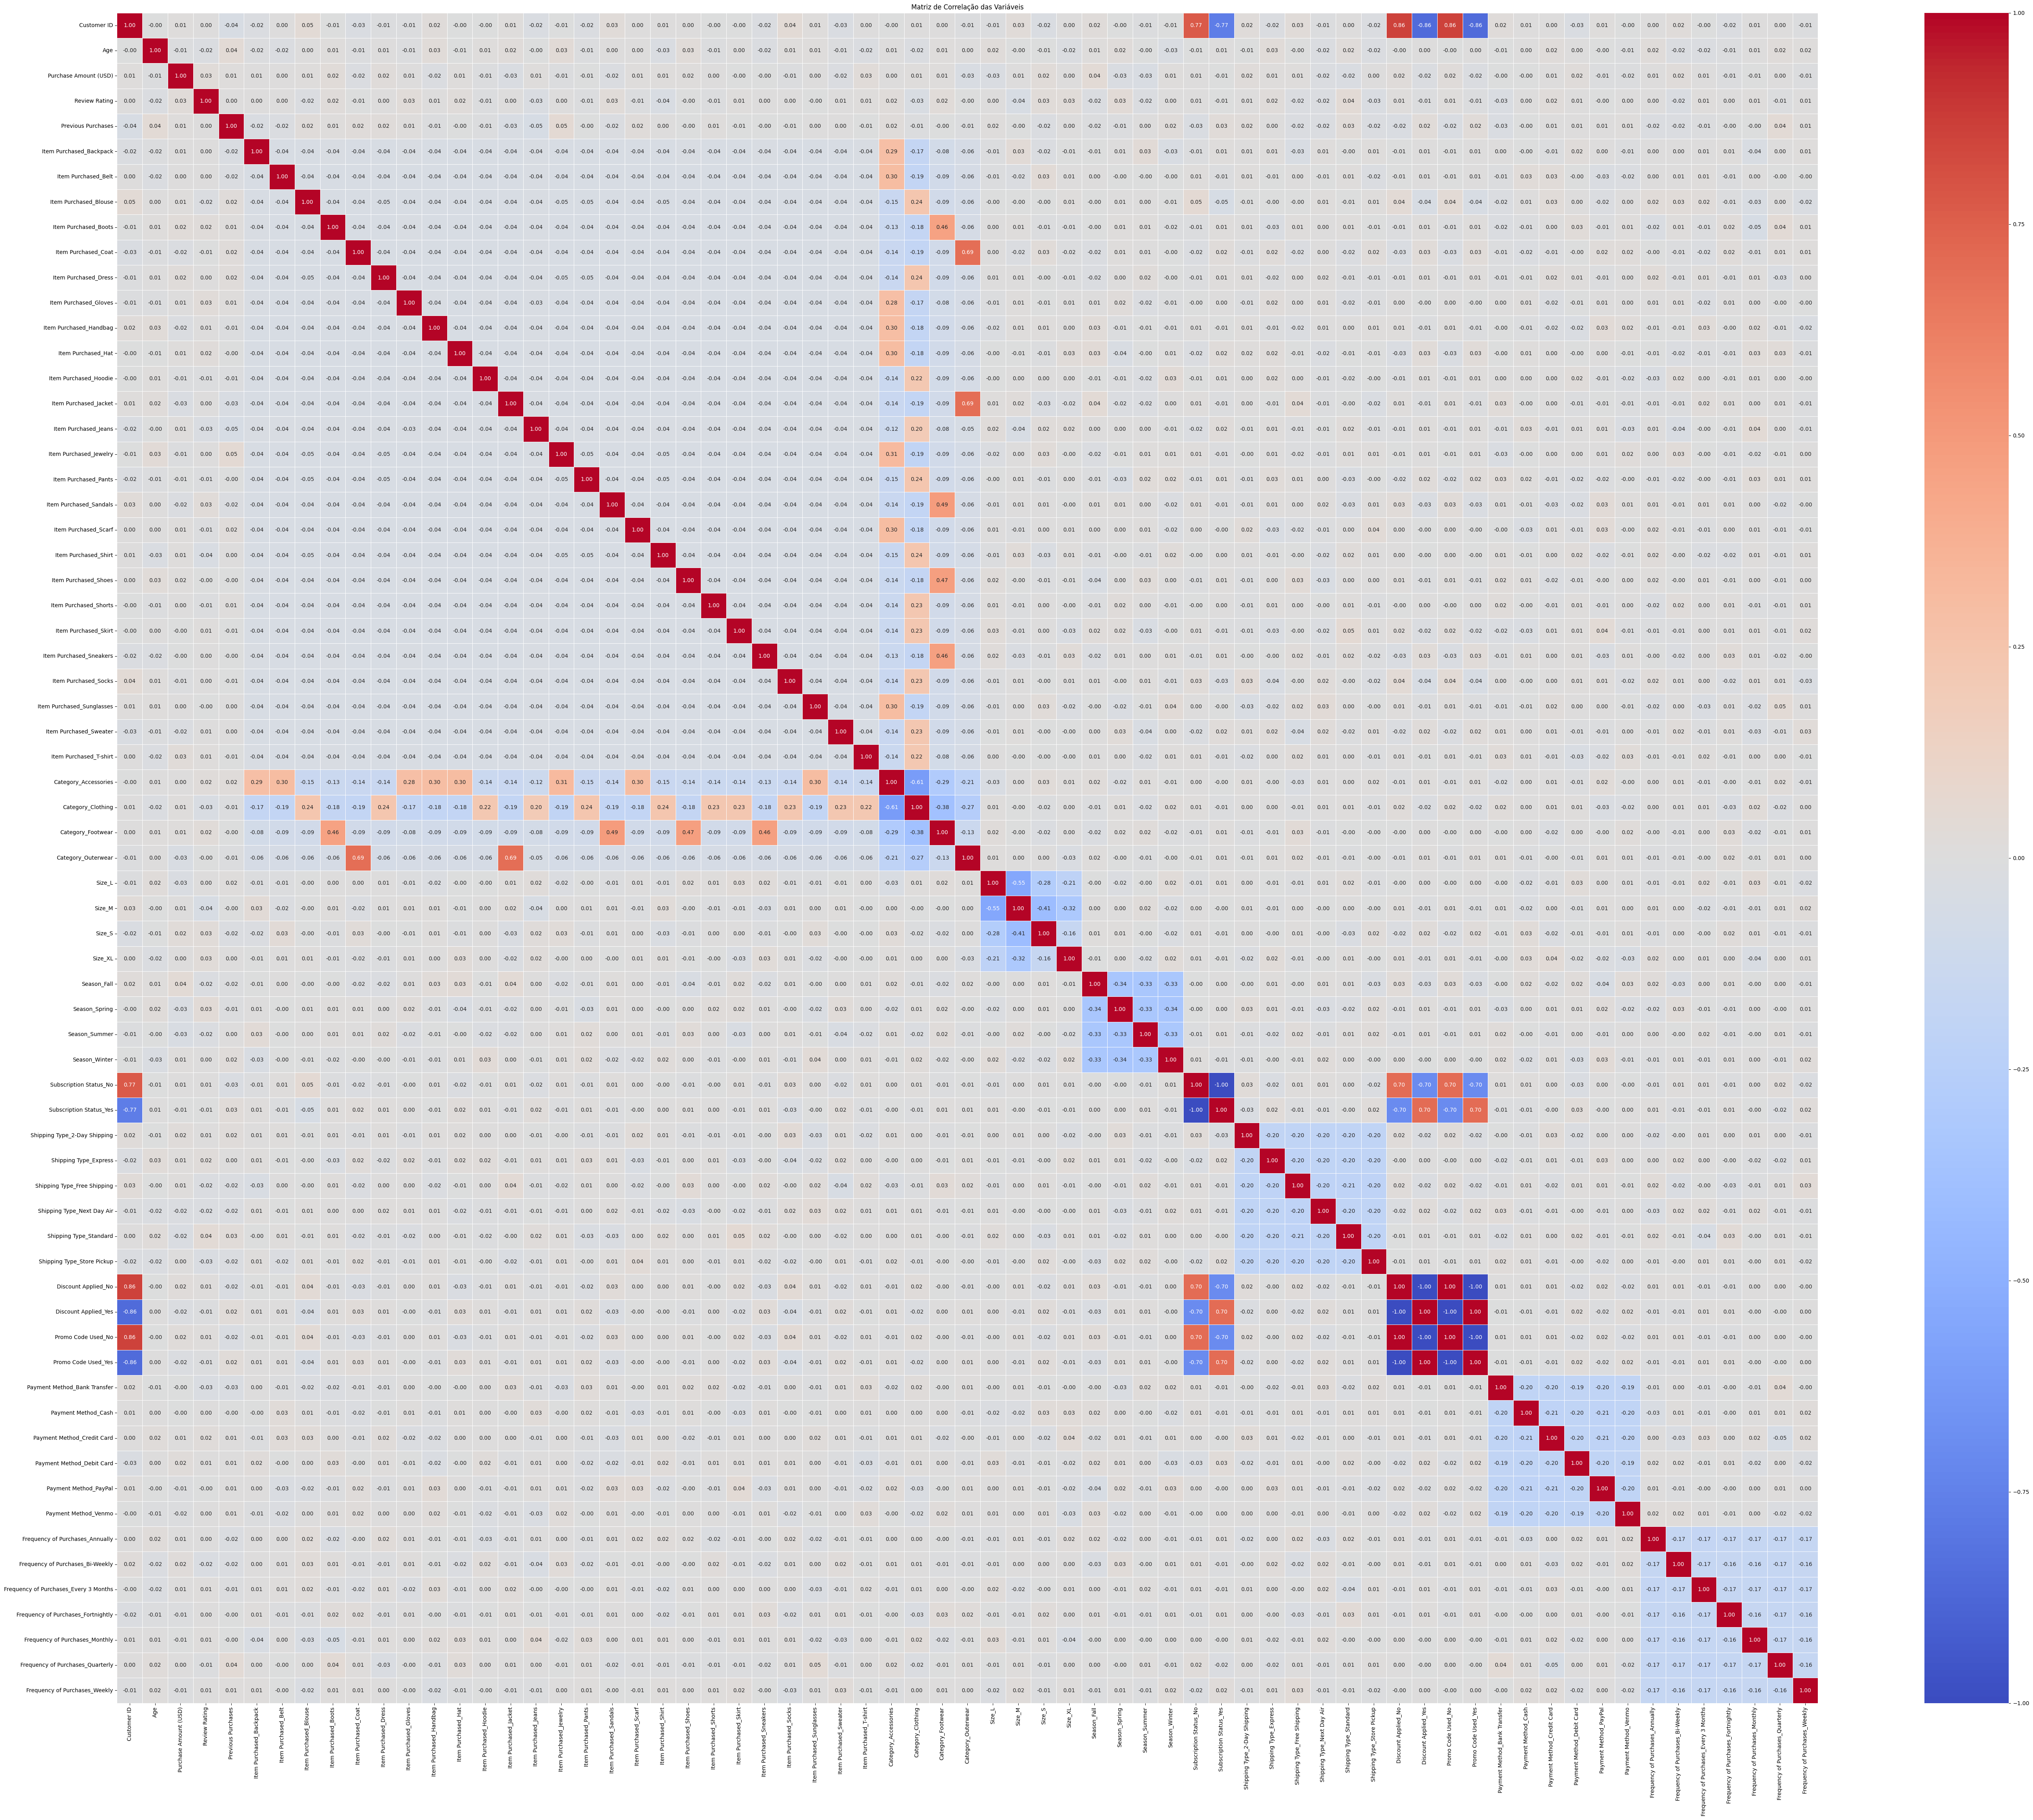

In [ ]:
# Mapa de calor completo. Utilizar somente se desejar ver o conteúdo integral, pois se mostrou muito grande e de difícil visualização.
correlation_matrix = data_encoded.corr()

# Criando um mapa de calor usando Seaborn
plt.figure(figsize=(70, 56))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

**Análise de correlação**: É possível fazer algumas inferencias em relação a matriz de correlação:

Os clientes do conjunto de dados possuem uma forte preferência por agasalhos, como Casacos e Jaquetas. Provavelmente tem relação com preferências de moda, uma vez que as estações do ano demonstram baixa correlação com a compra desses itens;

Em seguida, é possível identificar que a preferência secundária do grupo de estudo é para calçados, como botas, sandalias, sapatos e tênis. Mais uma vez, estações do ano não possuem forte correlação com essa preferência.

Interessantemente a idade também não parece ter grande influência nas preferencias dos consumidores para este conjunto de dados, uma vez que a sua correlação com todas as outras possibilidades é baixa.

É interessante notar também que as frequencias de compras estão distribuidas de forma homogênea, ou seja, compras são feitas em  quantidades similares para diferentes espaçamentos entre compras.

Outro dado interessante é observar que, quando um cliente possui inscrição na loja, ele tem uma forte possibilidade de receber descontos, mas isso não necessáriamente eleva seu consumo de itens.


# Treinando o Algoritmo
- Para este caso utilizaremos o discriminador linear

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [46]:
# Perceba que estamos passando apenas o x de teste,
# afinal o algoritmo é que nos dira qual é o y
y_predicoes = lda.predict(x_test)

In [47]:
y_predicoes

array(['Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'M

# Modelos de Classificação

In [48]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

**Precision (Precisão)**:
A precisão é a proporção de verdadeiros positivos (instâncias corretamente classificadas como positivas) em relação ao total de instâncias classificadas como positivas (verdadeiros positivos + falsos positivos).
Valores: Quanto mais próximo de 1, melhor. Indica a precisão das predições positivas.

**Recall (Revocação ou Sensibilidade)**:
O recall é a proporção de verdadeiros positivos em relação ao total de instâncias verdadeiramente positivas (verdadeiros positivos + falsos negativos).
Valores: Quanto mais próximo de 1, melhor. Indica a capacidade do modelo de recuperar todas as instâncias positivas.

**F1-Score**:
O F1-Score é a média harmônica ponderada de precisão e recall. É uma métrica que equilibra precisão e recall.
Valores: Quanto mais próximo de 1, melhor. Indica um equilíbrio entre precisão e recall.

**Support**:
O suporte é o número total de instâncias de cada classe no conjunto de dados de teste.
Valores: Números mais altos indicam que a classe tem mais instâncias no conjunto de dados.

**Accuracy (Acurácia)**:
A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias.
Valores: Quanto mais próximo de 1, melhor. Indica a precisão geral do modelo.

**Macro AVG (Média Macro)**:
A média macro é a média não ponderada das métricas de cada classe. Calcula as métricas de cada classe independentemente e as médias.
Valores: Quanto mais próximo de 1, melhor. Indica uma performance equilibrada para todas as classes.

**Weighted AVG (Média Ponderada)**:
A média ponderada leva em consideração o suporte (número de instâncias) de cada classe ao calcular a média.
Valores: Quanto mais próximo de 1, melhor. Indica uma performance equilibrada, dando mais peso às classes com mais instâncias.

In [49]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      Female       0.54      1.00      0.70       228
        Male       1.00      0.65      0.79       552

    accuracy                           0.75       780
   macro avg       0.77      0.82      0.74       780
weighted avg       0.87      0.75      0.76       780



Precision: Nesse caso é perfeito para Male e não tão bom para Female.

Recall: É perfeito para Female e não muito bom para Male.

F1-score: Existe um equilibrio rasoavel entre Male e Female.

Support: Existem mais dados male do que female.

Accuracy: A precisão geral do modelo é rasoavelmente boa.

Macro AVG: O equilibrio para todas as classes é rasoavel.

Weighted AVG: O equilibrio nessa situação é rasoavel.
<br><br>
**Interpretação Geral**:
O modelo tem uma precisão perfeita para a classe "Male", mas uma precisão relativamente baixa para a classe "Female".
O recall é alto para "Female" e mais baixo para "Male".
A acurácia geral do modelo é razoável, mas pode haver desequilíbrio de desempenho entre as classes, dependendo dos objetivos específicos do problema.


In [ ]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 4 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = knn.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      Female       0.99      1.00      1.00       228
        Male       1.00      1.00      1.00       552

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



Precision: Nesse caso é perfeito para Male e quase perfeito para Female.

Recall: É perfeito para Female e Male.

F1-score: Existe um equilibrio perfeito em Male e Female.

Support: Existem mais dados male do que female.

Accuracy: A precisão geral do modelo é perfeita.

Macro AVG: O equilibrio para todas as classes é perfeito.

Weighted AVG: O equilibrio nessa situação é perfeito.
<br><br>
**Interpretação Geral**:
O modelo parece ter um desempenho excepcional, alcançando 100% de precisão, recall e F1-Score para ambas as classes. Isso sugere que o modelo é capaz de classificar perfeitamente as instâncias do conjunto de teste para as classes "Female" e "Male".

In [50]:
# RandomForest (modelo mais adequado)
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       228
        Male       1.00      1.00      1.00       552

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



Precision: Nesse caso é perfeito para Male e Female.

Recall: É perfeito para Female e Male.

F1-score: Existe um equilibrio perfeito em Male e Female.

Support: Existem mais dados male do que female.

Accuracy: A precisão geral do modelo é perfeita.

Macro AVG: O equilibrio para todas as classes é perfeito.

Weighted AVG: O equilibrio nessa situação é perfeito.
<br><br>
**Interpretação Geral**:
Assim como o exemplo anterior, o modelo parece ter um desempenho excepcional, alcançando 100% de precisão, recall e F1-Score para ambas as classes. Isso sugere que o modelo é capaz de classificar perfeitamente as instâncias do conjunto de teste para as classes "Female" e "Male".

# Matriz de Confusão

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [52]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Male','Female'])

<Figure size 1500x500 with 0 Axes>

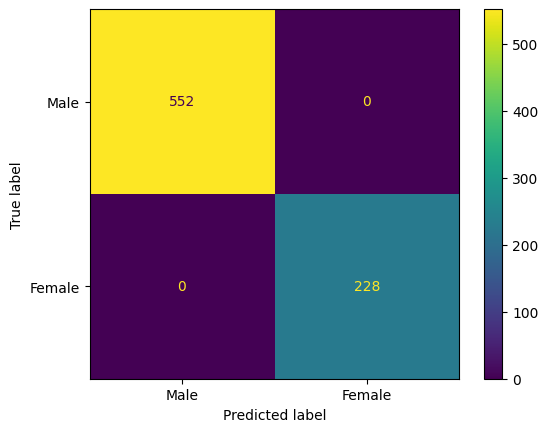

In [53]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['Male','Female'])

disp.plot(values_format='d')

# Métricas de precisão, revocação, f1-score e acurácia

In [ ]:
print('Accuracy Score')
accuracy_score(y_true = y_test, y_pred = y_predicoes)

Accuracy Score


1.0

In [ ]:
print('Precision Score')
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label="Male")

Precision Score


1.0

In [ ]:
print('Recall Score')
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label="Male")

Recall Score


1.0

In [ ]:
print('F1 Score')
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label="Male")

F1 Score


1.0

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print('Classification Report')
print(classification_report(y_test, y_predicoes))

Classification Report
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       228
        Male       1.00      1.00      1.00       552

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



In [ ]:
from sklearn.metrics import cohen_kappa_score
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

1.0

# Definindo o modelo ideal

No cenário apresentado acima, foram utilizados os seguintes modelos de classificação: Naive Bayes Gaussiano, KNN e Random Forest. O modelo Random Forest se mostrou o mais eficiente para o conjunto de dados, uma vez que as métricas de precisão, revocação, f1-score e acurácia apresentaram grande taxa de validade. Isso pode se dar por alguns fatores:

- **Alta Precisão**: Os modelos Random Forest geralmente oferecem alta precisão em tarefas de classificação e regressão. Eles são capazes de capturar relações complexas nos dados devido à combinação de múltiplas árvores de decisão;

- **Robustez a Overfitting**: Random Forests têm uma boa resistência ao overfitting, especialmente em comparação com árvores de decisão individuais. Ao treinar várias árvores e combinar suas previsões, o modelo é menos suscetível a ajustar-se excessivamente aos dados de treinamento;

- **Manuseio de Conjuntos de Dados Desbalanceados**: Random Forests podem lidar relativamente bem com conjuntos de dados desbalanceados, onde as classes de interesse têm diferentes números de exemplos;

- **Poucos Hiperparâmetros para Ajustar**: Random Forests têm relativamente poucos hiperparâmetros a serem ajustados, e muitos deles têm valores padrão que funcionam bem na prática. Isso simplifica o processo de ajuste do modelo.